In [8]:
#Setup
import sys
import os
sys.path.append('../src')

# Import the validator normally
from evaluation.model_validator_0169 import ModelValidator

# Special import for the file with a number prefix
import importlib.util

# Define the path to the performance metrics file
module_path = os.path.abspath('../src/evaluation/0169_performance_metrics.py')
module_name = 'performance_metrics'

# Load the module
spec = importlib.util.spec_from_file_location(module_name, module_path)
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)

# Import the class from the module
PerformanceAnalyzer = module.PerformanceAnalyzer

# Rest of your imports
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

print("Day 2: Cross-Validation and Performance Metrics")

Day 2: Cross-Validation and Performance Metrics


In [9]:
# Load data (simplified version)
try:
    train_df = pd.read_csv('../data/raw/train.tsv', sep='\t', header=None)
    columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job', 
              'state', 'party', 'barely_true', 'false', 'half_true', 
              'mostly_true', 'pants_fire', 'context']
    train_df.columns = columns
    
    # Simple preprocessing
    X = train_df['statement'].fillna('')
    y = train_df['label']
    
    print(f"Data loaded: {len(X)} samples")
    print(f"Labels: {y.value_counts()}")
    
except Exception as e:
    print(f"Error loading data: {e}")
    # Create dummy data for testing
    X = pd.Series(['This is true statement'] * 100 + ['This is false statement'] * 100)
    y = pd.Series(['true'] * 100 + ['false'] * 100)

Data loaded: 10240 samples
Labels: label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64


In [10]:
#Test cross-validation framework
validator = ModelValidator(cv_folds=5)
performance_analyzer = PerformanceAnalyzer()

# Create test models
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
simple_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Perform cross-validation
print("Testing cross-validation framework...")

# Test with dummy model
cv_results_dummy = validator.cross_validate(dummy_model, X, y, 'Dummy_Classifier')

# Test with simple model  
cv_results_simple = validator.cross_validate(simple_model, X, y, 'Simple_TF-IDF_Logistic')

print("\nCross-validation testing completed!")

Testing cross-validation framework...
Cross-validating Dummy_Classifier...


C:\Users\Malki Madushi\anaconda3\envs\fake-news-detection\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Malki Madushi\anaconda3\envs\fake-news-detection\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Malki Madushi\anaconda3\envs\fake-news-detection\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

Results for Dummy_Classifier:
  Accuracy: 0.206 (+/- 0.000)
  F1-Score: 0.071 (+/- 0.000)
Cross-validating Simple_TF-IDF_Logistic...
Results for Simple_TF-IDF_Logistic:
  Accuracy: 0.231 (+/- 0.025)
  F1-Score: 0.218 (+/- 0.024)

Cross-validation testing completed!


In [11]:
#Test performance metrics
from sklearn.model_selection import train_test_split

# Split data for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

# Train models
dummy_model.fit(X_train, y_train)
simple_model.fit(X_train, y_train)

# Get predictions
y_pred_dummy = dummy_model.predict(X_test)
y_pred_simple = simple_model.predict(X_test)

# Calculate metrics
metrics_dummy = performance_analyzer.calculate_metrics(
    y_test, y_pred_dummy, model_name='Dummy_Classifier')
metrics_simple = performance_analyzer.calculate_metrics(
    y_test, y_pred_simple, model_name='Simple_TF-IDF_Logistic')

print("Performance metrics calculated!")

Performance metrics calculated!


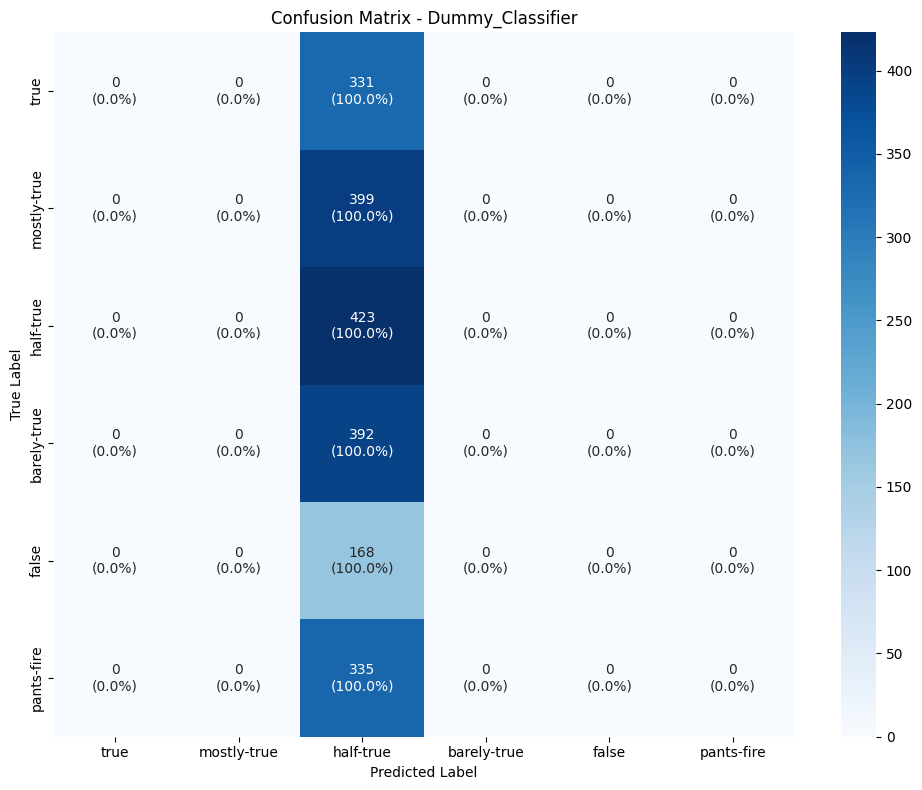

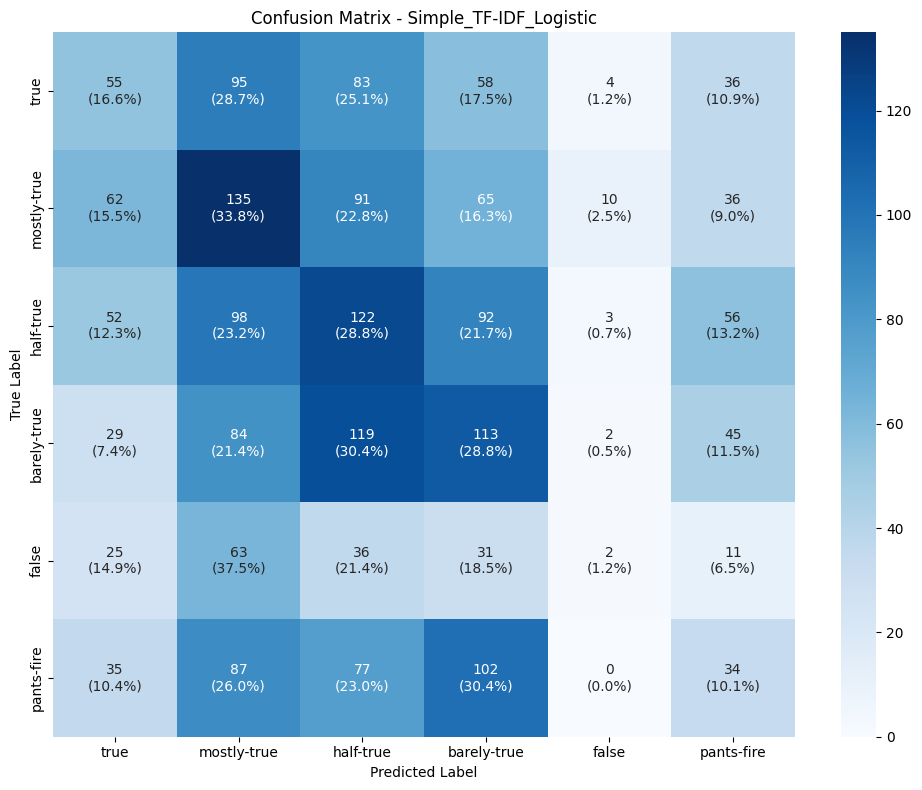

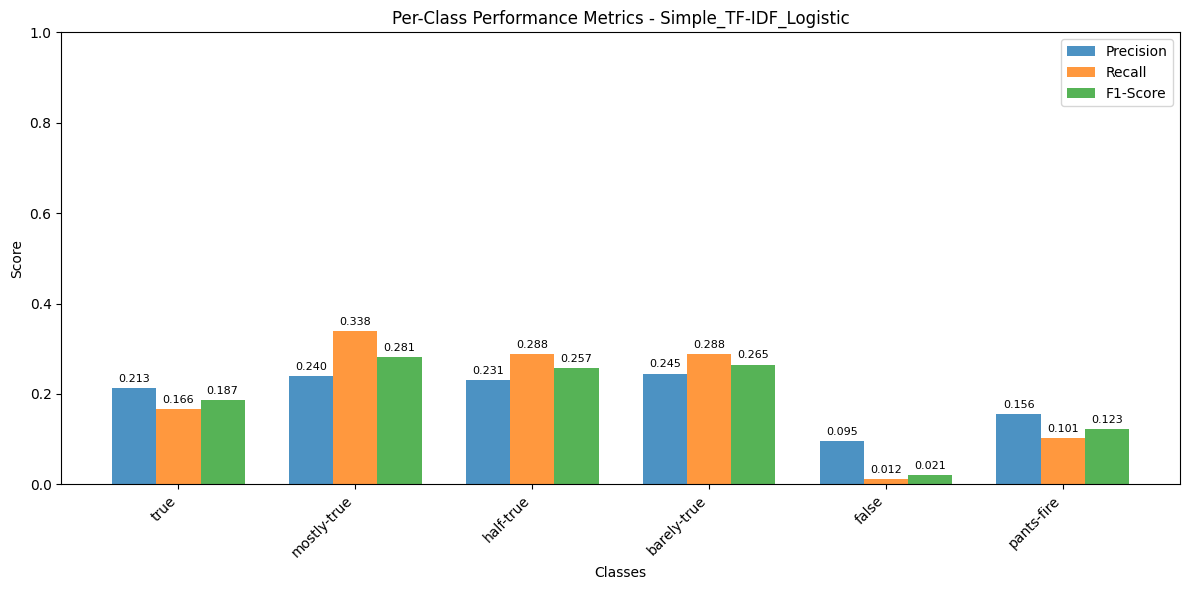

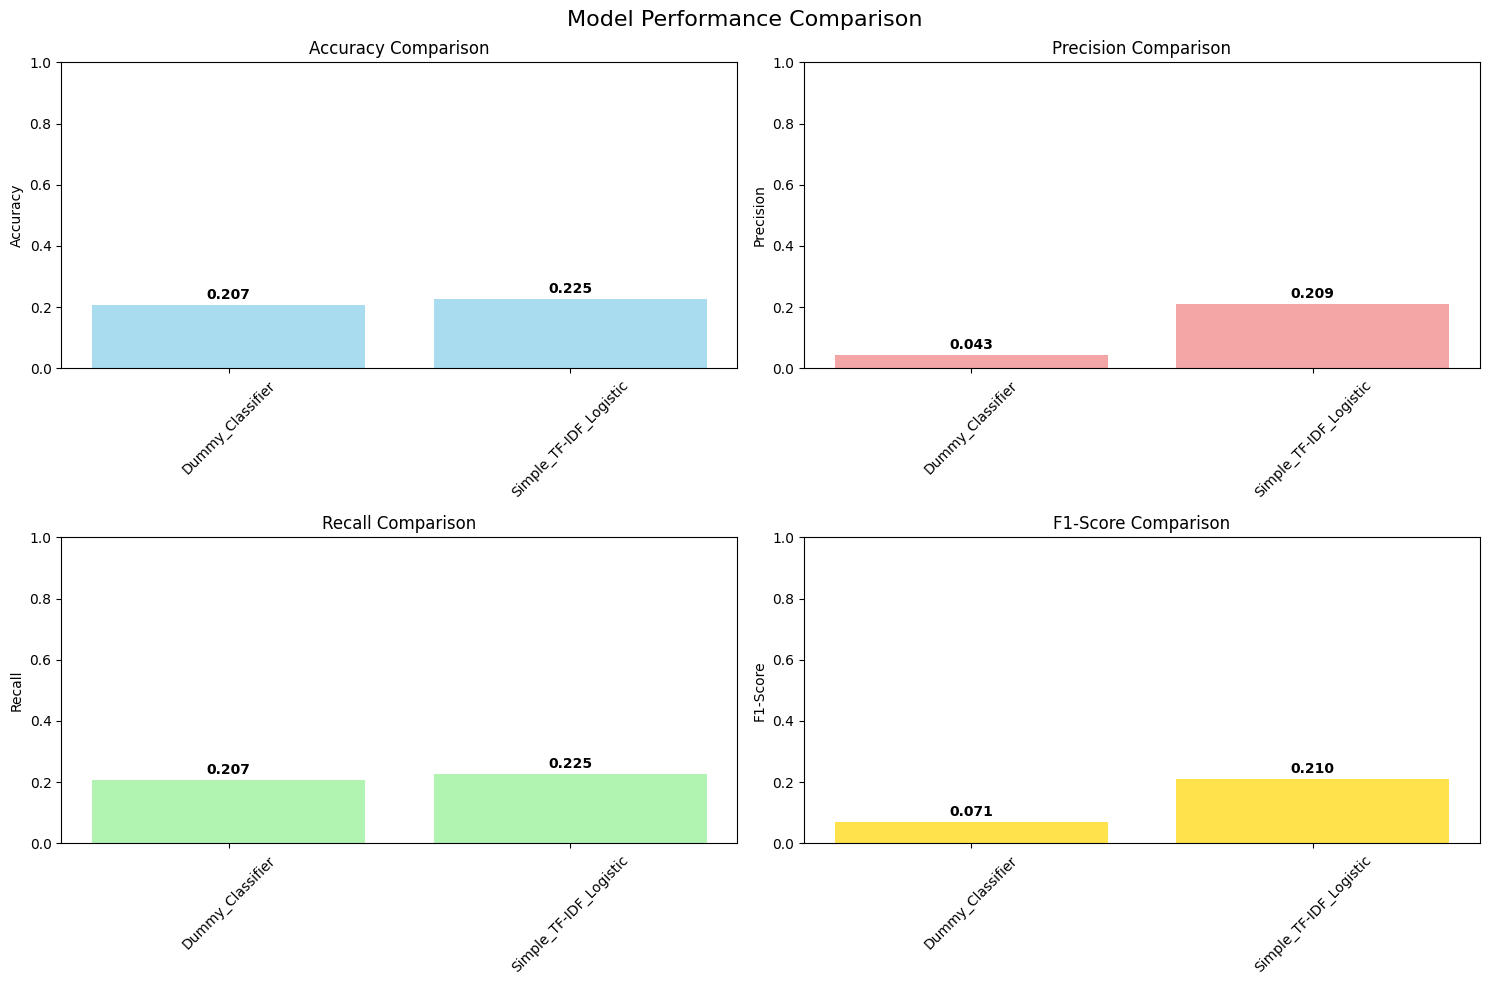


Model Comparison:
                    Model  Accuracy  Precision    Recall  F1-Score
0        Dummy_Classifier  0.206543   0.042660  0.206543  0.070714
1  Simple_TF-IDF_Logistic  0.225098   0.209219  0.225098  0.210477


In [12]:
#Generate visualizations
# Plot confusion matrices
performance_analyzer.plot_confusion_matrix('Dummy_Classifier', 
                                         '../results/plots/cm_dummy.png')
performance_analyzer.plot_confusion_matrix('Simple_TF-IDF_Logistic',
                                         '../results/plots/cm_simple.png')

# Plot per-class metrics
performance_analyzer.plot_per_class_metrics('Simple_TF-IDF_Logistic',
                                          '../results/plots/per_class_simple.png')

# Compare models
comparison_df = performance_analyzer.compare_models('../results/plots/model_comparison_day2.png')
print("\nModel Comparison:")
print(comparison_df)